28.55686245854129
  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  6.012e-02 ...  2.844e+01  2.850e+01]
        y: [[ 4.000e+03  4.000e+03 ...  3.354e+01  1.675e+01]
            [ 0.000e+00 -5.898e-01 ... -2.790e+02 -2.796e+02]]
      sol: None
 t_events: [array([ 2.856e+01])]
 y_events: [array([[ 0.000e+00, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0


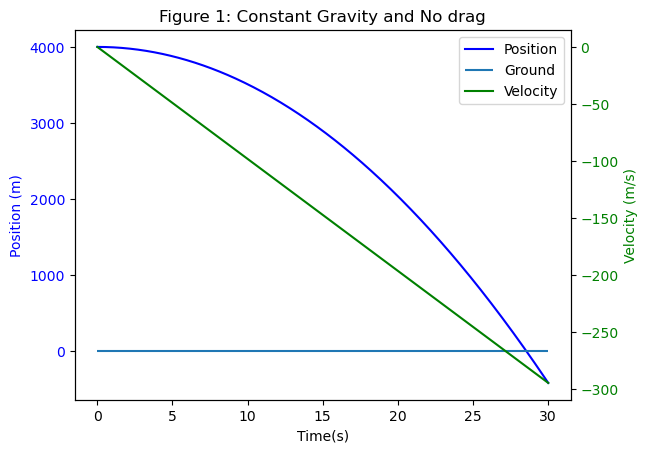

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Part 1 Q1
y = 4000 #m (Top of shaft)
g0 = 9.81 #m/s^2 (gravity)
t = ((2*y)/g0)**0.5 #theoretical time needed to reach bottom of shaft 

print(t)

def d2ydt2(t,s, alpha, gamma,g=9.81):
    y, v = s
    dydt = v
    dvdt = -g + alpha * v**gamma
    return [dydt,dvdt]

t0 = 0 #Initial time
N = 500 #number of data points
y0 = 4000 #Starting y position
alpha1=0 #drag
gamma1= 1 #speed dependence of drag
v0 = 0 # initial velocity
t_final = 30 #final time 
t_vals = np.linspace(t0,t_final,N) #Time from start to finish

soln = solve_ivp(fun=d2ydt2, t_span=(t0,t_final), args=(alpha1,gamma1), t_eval=t_vals,y0=[y0,v0])

yy = soln.y[0]   #coordinate
vv = soln.y[1]   #Velocity

def stopping(t,s, alpha, gamma):  #stopping condition
    return s[0]
    
stopping.terminal = True

soln1 = solve_ivp(fun=d2ydt2, t_span=(t0,t_final), args=(alpha1,gamma1), t_eval=t_vals,y0=[y0,v0], events=stopping)

print(soln1)

fig, ax = plt.subplots(1,1)

ax1 = ax.twinx()
ax.plot(t_vals, yy, color='b', label='Position')
ax.set_ylabel('Position (m)',color='b')
ax.tick_params(axis='y', labelcolor='b')
ax1.plot(t_vals, vv, color ='g', label='Velocity')
ax1.set_ylabel('Velocity (m/s)', color="g")
ax1.tick_params(axis='y', labelcolor='g')
ax.set_xlabel('Time(s)')
ax.hlines(0, 0, 30, label='Ground')
ax.set_title('Figure 1: Constant Gravity and No drag')
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
plt.show()


28.55835511190964
  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  6.012e-02 ...  2.850e+01  2.856e+01]
        y: [[ 4.000e+03  4.000e+03 ...  1.717e+01  3.476e-01]
            [ 0.000e+00 -5.898e-01 ... -2.795e+02 -2.801e+02]]
      sol: None
 t_events: [array([ 2.856e+01])]
 y_events: [array([[ 4.547e-13, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0


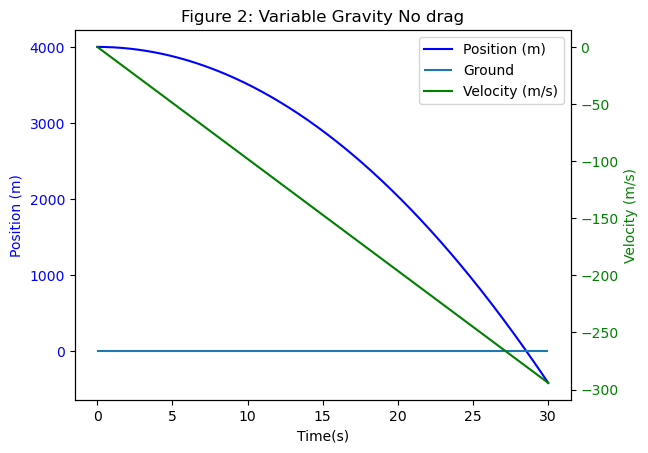

In [2]:
from scipy.integrate import quad

RE = 6.3781e6 #meters (Radius of the Earth)
g0 = 9.81 #m/s^2 (regular gravity at surface)
def dg(y):
    r = RE - 4000 + y
    return g0*(r/RE)

def d2ydt2(t,s, alpha, gamma):
    y, v = s
    dydt = v
    dvdt = -dg(y) + alpha * v**gamma
    return [dydt,dvdt]

def stopping1(t,s, alpha, gamma):
    return s[0]
    
stopping1.terminal = True
    
soln2 = solve_ivp(fun=d2ydt2, t_span=(t0,t_final), args=(alpha1,gamma1), t_eval=t_vals, y0=[y0,v0])

soln3 = solve_ivp(fun=d2ydt2, t_span=(t0,t_final), args=(alpha1,gamma1), t_eval=t_vals, y0=[y0,v0], events=stopping1)

yy2 = soln2.y[0]
vv2 = soln2.y[1]
print(soln3.t_events[0][0])
print(soln3)

fig, ax2 = plt.subplots(1,1)

ax3 = ax2.twinx()
ax2.plot(t_vals, yy2, color='b', label='Position (m)')
ax2.set_ylabel('Position (m)',color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax3.plot(t_vals, vv2, color ='g', label='Velocity (m/s)')
ax3.set_ylabel('Velocity (m/s)', color="g")
ax3.tick_params(axis='y', labelcolor='g')
ax2.set_xlabel('Time(s)')
ax2.hlines(0, 0, 30, label='Ground')
ax2.set_title('Figure 2: Variable Gravity No drag')
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
plt.show()


  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  6.012e-02 ...  2.994e+01  3.000e+01]
        y: [[ 4.000e+03  4.000e+03 ...  2.680e+03  2.677e+03]
            [ 0.000e+00 -5.898e-01 ... -5.000e+01 -5.000e+01]]
      sol: None
 t_events: [array([ 8.354e+01])]
 y_events: [array([[ 1.705e-13, -4.997e+01]])]
     nfev: 128
     njev: 0
      nlu: 0
Time to reach bottom = 83.54305548597647


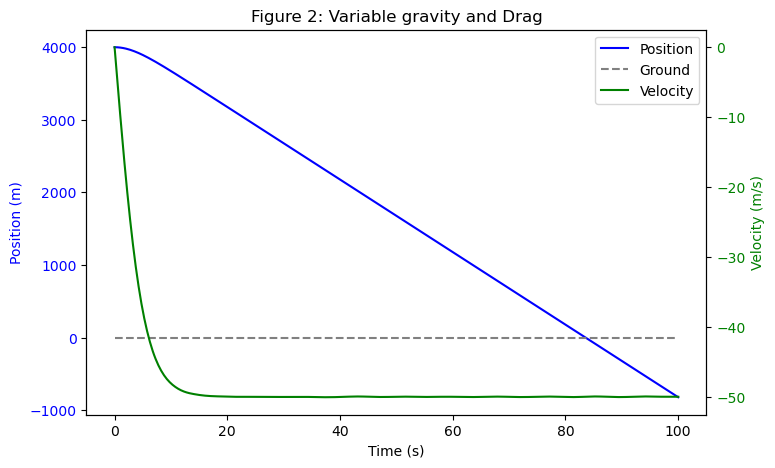

In [3]:
RE = 6.3781e6  # Earth radius (meters)

# function describing change in gravity as y changes
def dg(y):
    r = RE - 4000 + y
    return g0 * (r / RE)

#modified version of original function
def d2ydt2_var(t, s, alpha, gamma):
    y, v = s
    dydt = v
    dvdt = -dg(y) + alpha * (np.abs(v))**gamma
    return [dydt, dvdt]

t_val = np.linspace(0,100,400)

# applying given factors
alpha1 = g0 / (50**2)
gamma1 = 2

# new solution through solve_ivp
soln4 = solve_ivp(fun=d2ydt2_var, t_span=(t0, 100), args=(alpha1, gamma1), t_eval=t_val, y0=[y0, v0])

yy3 = soln4.y[0]
vv3 = soln4.y[1]

def stopping1(t, s, alpha, gamma):
    return s[0]  # when position becomes 0
stopping1.terminal = True

soln5 = solve_ivp(fun=d2ydt2_var, t_span=(t0, 500), args=(alpha1, gamma1), t_eval=t_vals, y0=[y0, v0], events=stopping1)
print(soln5)
t_bottom = soln5.t_events[0][0]
print(f'Time to reach bottom = {t_bottom}')

fig, ax2 = plt.subplots(figsize=(8, 5))
ax3 = ax2.twinx()
ax2.plot(soln4.t, yy3, color='b', label='Position')
ax2.set_ylabel('Position (m)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax3.plot(soln4.t, vv3, color='g', label='Velocity')
ax3.set_ylabel('Velocity (m/s)', color='g')
ax3.tick_params(axis='y', labelcolor='g')
ax2.set_xlabel('Time (s)')
ax2.hlines(0, t0, 100, colors='gray', linestyles='--', label="Ground")
ax2.set_title('Figure 2: Variable gravity and Drag')
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
plt.show()

Detected wall collisions:
Collision 1: time = 21.886683354772302 s, height (y) = 1650.3750099244487 m


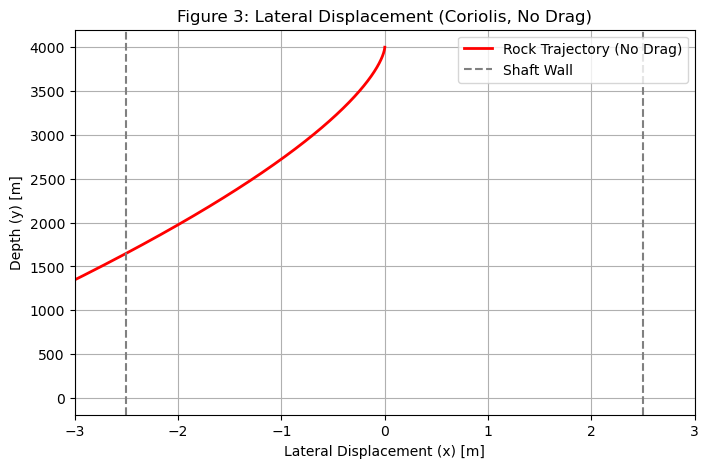

Detected wall collisions:
Collision 1: time = 29.58905952465849 s, height (y) = 2697.07787635588 m


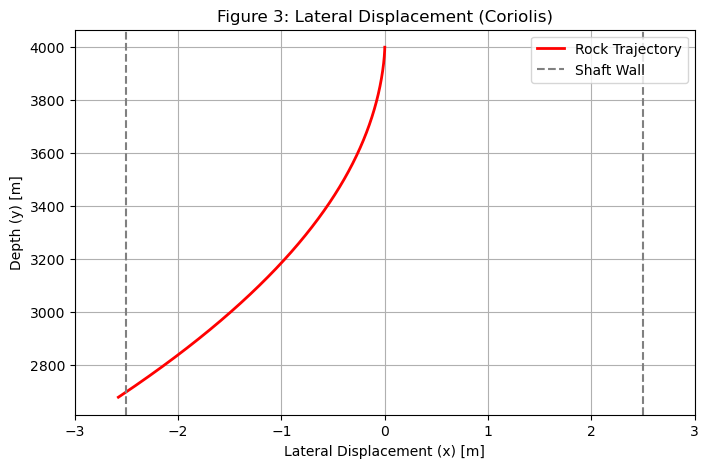

In [4]:
g0 = 9.81         # m/s^2, gravitational acceleration
Omega = 7.2921e-5 # rad/s, Earth's rotation rate (at the equator)
y0_val = 4000     # m, initial vertical position (start at top)
x0_val = 0        # m, initial horizontal position (center of shaft)
v0 = 0            # m/s, initial vertical velocity
vx0 = 0           # m/s, initial horizontal velocity

# The state vector: [y, x, v_y, v_x]
initial_state = [y0_val, x0_val, v0, vx0]

# Times
t0 = 0
t_final = 30   #seconds
N = 1000
t_vals = np.linspace(t0, t_final, N)

def coriolis_no_drag(t, s):
    y, x, vy, vx = s
    a_gravity = -g0
    a_coriolis_y = -2 * Omega * vx
    a_coriolis_x =  2 * Omega * vy
    a_y = a_gravity + a_coriolis_y
    a_x = a_coriolis_x
    return [vy, vx, a_y, a_x]

def hit_ground(t, s):
    return s[0] 
hit_ground.terminal = True
hit_ground.direction = -1 

shaft_radius = 2.5 #radius where shaft will be -2.5 and 2.5 on both sides so it is 5 meters wide

def wall_event(t, s):
    return np.abs(s[1]) - shaft_radius

wall_event.terminal = False  # we want to detect all collisions without halting the integration
wall_event.direction = 0   


sol_no_drag = solve_ivp(fun=coriolis_no_drag,t_span=(t0, t_final),y0=initial_state,t_eval=t_vals,events=[wall_event, hit_ground])

wall_times = sol_no_drag.t_events[0]
wall_states = sol_no_drag.y_events[0]  # each is a state: [y, x, vy, vx]

y_no_drag = sol_no_drag.y[0]  # vertical position
x_no_drag = sol_no_drag.y[1]  # lateral position

def coriolis(t, s, alpha, gamma):
    y, x, vy, vx = s
    a_gravity = -g0
    
    a_drag_y = -alpha * (abs(vy)**gamma) * np.sign(vy) # np.sign ensures drag stays positive to resist motion
    a_drag_x = -alpha * (abs(vx)**gamma) * np.sign(vx)
    
    a_coriolis_y = -2 * Omega * vx
    a_coriolis_x =  2 * Omega * vy 
    
    a_y = a_gravity + a_drag_y + a_coriolis_y
    a_x = a_drag_x + a_coriolis_x
    return [vy, vx, a_y, a_x]

#stopping condition
def hit_ground(t, s, alpha, gamma):
    return s[0]
hit_ground.terminal = True

# drag so that terminal velocity is 50 m/s:
alpha_drag = g0 / (50**2)
gamma_val = 2

sol_with_drag = solve_ivp(fun=lambda t, s: coriolis(t, s, alpha_drag, gamma_val),t_span=(t0, t_final),y0=initial_state,t_eval=t_vals,events=[wall_event,lambda t, s: hit_ground(t, s, alpha_drag, gamma_val)])

wall_times2 = sol_with_drag.t_events[0]
wall_states2 = sol_with_drag.y_events[0]

y_with_drag = sol_with_drag.y[0]
x_with_drag = sol_with_drag.y[1]

print("Detected wall collisions:")
for i, event_time in enumerate(wall_times):
    state_event = wall_states[i]
    # Report time and vertical position (height) when bump occurs:
    print(f"Collision {i+1}: time = {event_time} s, height (y) = {state_event[0]} m")

#no drag
fig, ax3 = plt.subplots(figsize=(8, 5))
ax3.plot(x_no_drag, y_no_drag, color='r', lw=2, label='Rock Trajectory (No Drag)')
ax3.axvline(shaft_radius, color='gray', linestyle='--', lw=1.5, label='Shaft Wall')
ax3.axvline(-shaft_radius, color='gray', linestyle='--', lw=1.5)
ax3.set_xlabel("Lateral Displacement (x) [m]")
ax3.set_ylabel("Depth (y) [m]")
ax3.set_title("Figure 3: Lateral Displacement (Coriolis, No Drag)")
ax3.set_xlim(-shaft_radius * 1.2, shaft_radius * 1.2)
ax3.grid()
plt.legend(loc='upper right')
plt.show()

print("Detected wall collisions:")
for i, event_time in enumerate(wall_times2):
    state_event = wall_states2[i]
    # Report time and vertical position (height) when bump occurs:
    print(f"Collision {i+1}: time = {event_time} s, height (y) = {state_event[0]} m")

#Drag
fig, ax3 = plt.subplots(1,1, figsize=(8, 5))
ax3.plot(x_with_drag, y_with_drag, color='r', lw=2, label='Rock Trajectory')
ax3.axvline(shaft_radius, color='gray', linestyle='--', lw=1.5, label='Shaft Wall')
ax3.axvline(-shaft_radius, color='gray', linestyle='--', lw=1.5)
ax3.set_xlabel("Lateral Displacement (x) [m]")
ax3.set_ylabel("Depth (y) [m]")
ax3.set_title("Figure 3: Lateral Displacement (Coriolis)")
ax3.set_xlim(-shaft_radius*1.2, shaft_radius*1.2)
ax3.grid()
plt.legend(loc='upper right')
plt.show()

"Time to reach the center of the Earth:", 1266.58, (s)
"Speed at the center:", 7910.07 (m/s)
"Time to reach the opposite side 2533.15, (s)


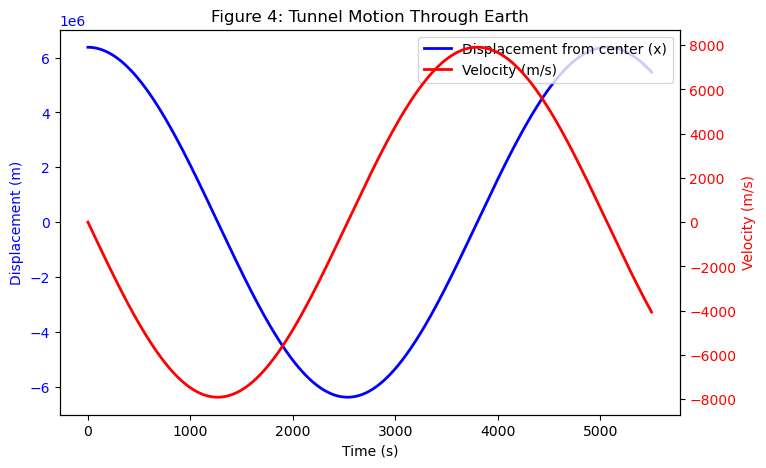

Orbital period at Earth's surface = 5069.37 s
Note: For a uniform Earth, the full tunnel period T equals the orbital period.


In [5]:
R_earth = 6.3781e6     # m

omega = np.sqrt(g0 / R_earth)
T = 2 * np.pi / omega   # crossing

def tunnel_ode(t, X):
    return [X[1], - (g0 / R_earth) * X[0]]


# Release from the surface
X0 = [R_earth, 0]

t0 = 0
t_final = 5500   # seconds
t_eval = np.linspace(t0, t_final, 2000)

soln = solve_ivp(tunnel_ode, (t0, t_final), X0, t_eval=t_eval, dense_output=True)

#detection of center crossing time
def center_crossing(t, X):
    return X[0]
center_crossing.terminal = False
center_crossing.direction = -1

soln_center = solve_ivp(tunnel_ode, (t0, t_final), X0, events=center_crossing, max_step=1)

if soln_center.t_events[0].size > 0:
    t_center = soln_center.t_events[0][0]
    v_center = soln_center.y_events[0][0][1]

print(f'"Time to reach the center of the Earth:", {t_center:.2f}, (s)')
print(f'"Speed at the center:", {abs(v_center):.2f} (m/s)')

x_vals = soln.y[0]
t_vals = soln.t
min_index = np.argmin(x_vals)
t_opposite = t_vals[min_index]
print(f'"Time to reach the opposite side {T/2:.2f}, (s)')

fig4, ax4 = plt.subplots(figsize=(8, 5))
ax4.plot(t_vals, x_vals, 'b-', lw=2, label='Displacement from center (x)')
ax4.set_xlabel("Time (s)")
ax4.set_ylabel("Displacement (m)", color='b')
ax4.tick_params(axis='y', labelcolor='b')

ax4_2 = ax4.twinx()
ax4_2.plot(soln.t, soln.y[1], 'r-', lw=2, label='Velocity (m/s)')
ax4_2.set_ylabel("Velocity (m/s)", color='r')
ax4_2.tick_params(axis='y', labelcolor='r')

ax4.set_title("Figure 4: Tunnel Motion Through Earth")
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_2.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
plt.show()


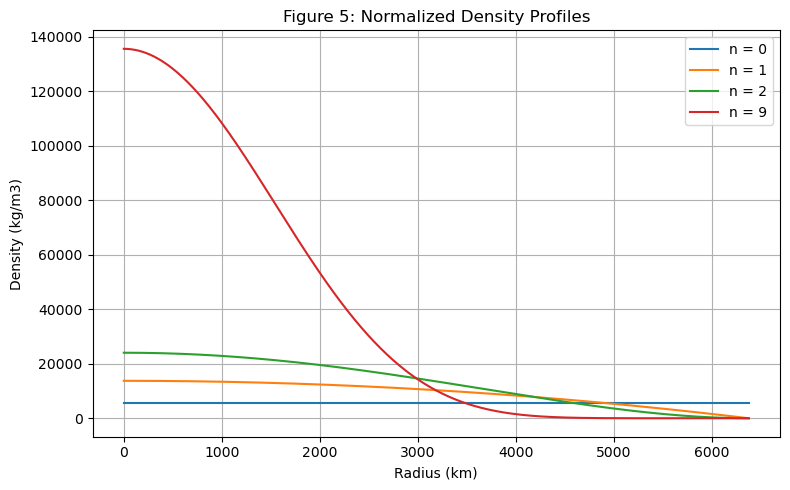

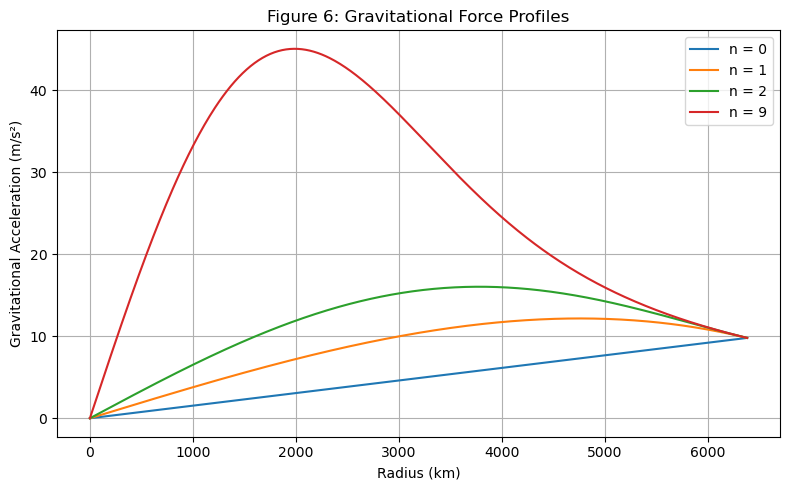

n = 0: Time to center = 1267.343 (s), Speed at center = 7905.277 (m/s)
n = 1: Time to center = 1096.513 (s), Speed at center = 10457.699 (m/s)
n = 2: Time to center = 1035.076 (s), Speed at center = 12182.850 (m/s)
n = 9: Time to center = 943.778 (s), Speed at center = 18370.674 (m/s)


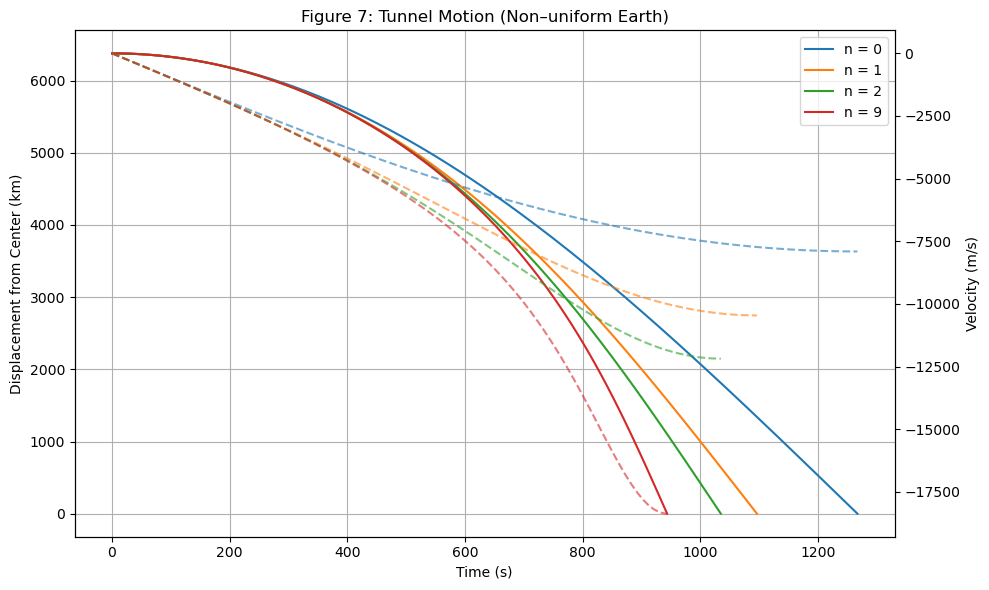

In [6]:
G = 6.6743e-11       # gravitational constant m^3/(kg s^2)
M_earth = 5.972e24   #kg
R_earth = 6.3781e6      # m
n_values = [0, 1, 2, 9]  # exponents

def density_profile(r, n, rho_n):
    return rho_n * (1 - (r**2)/(R_earth**2))**n

def p_n(n):
    integrand = lambda r: (1 - (r**2)/(R_earth**2))**n * r**2
    integral, _ = quad(integrand, 0, R_earth)
    rho_n = M_earth / (4 * np.pi * integral)
    return rho_n

fig, ax5 = plt.subplots(figsize=(8, 5))
r_vals = np.linspace(0, R_earth, 500)
for n in n_values:
    rho_n_val = p_n(n)
    dens = density_profile(r_vals, n, rho_n_val)
    ax5.plot(r_vals/1e3, dens, label=f"n = {n}")  # r in km
ax5.set_xlabel("Radius (km)")
ax5.set_ylabel("Density (kg/m3)")
ax5.set_title("Figure 5: Normalized Density Profiles")
ax5.legend()
ax5.grid()
fig.tight_layout()
plt.show()

fig, ax6 = plt.subplots(figsize=(8, 5))
r_threshold = 1.0  # meters
for n in n_values:
    rho_n_val = p_n(n)
    F_vals = []
    for r in r_vals:
        if r < r_threshold:
            # For small r
            if np.abs(r) < 1e-12:
                F_vals.append(0.0)
            else:
                rho0 = density_profile(0, n, rho_n_val)
                F_approx = (4.0 * np.pi / 3.0) * G * rho0 * r
                F_vals.append(F_approx)
        else:
            integrand = lambda r_prime: density_profile(r_prime, n, rho_n_val) * r_prime**2
            mass_inside, _ = quad(integrand, 0, r)
            mass_inside *= 4 * np.pi
            F_vals.append(G * mass_inside / (r**2))
    ax6.plot(r_vals/1e3, F_vals, label=f"n = {n}")
ax6.set_xlabel("Radius (km)")
ax6.set_ylabel("Gravitational Acceleration (m/s²)")
ax6.set_title("Figure 6: Gravitational Force Profiles")
ax6.legend()
ax6.grid()
fig.tight_layout()
plt.show()

def m_inside(r, n, rho_n):
    if r < 1e-6:
        return 0.0
    integrand = lambda r_prime: density_profile(r_prime, n, rho_n) * r_prime**2
    mass, _ = quad(integrand, 0, r)
    return 4 * np.pi * mass

def nonuniform(t, X, n, rho_n):
    x, v = X
    r = abs(x)
    if r < 1e-6:
        a = 0.0
    else:
        mass_enclosed = m_inside(r, n, rho_n)
        a = -G * mass_enclosed / (r**2) * np.sign(x)
    return [v, a]

def center_event(t, X, *args):
    #using *args for any other arguments
    return X[0]
center_event.terminal = True
center_event.direction = -1

results = {}
t0_dyn = 0
t_final_dyn = 20000  # s

for n in n_values:
    rho_n_val = p_n(n)
    X0 = [R_earth, 0]  # release from the surface with zero initial velocity
    sol_dyn = solve_ivp(nonuniform, (t0_dyn, t_final_dyn), X0, args=(n, rho_n_val), dense_output=True, max_step=10, events=center_event)
    if sol_dyn.t_events[0].size > 0:
        t_center = sol_dyn.t_events[0][0]
        v_center = sol_dyn.sol(t_center)[1]
    else:
        t_center = None
        v_center = None
    results[n] = {'t_center': t_center, 'v_center': v_center, 'sol': sol_dyn}
    if t_center is not None:
        print(f"n = {n}: Time to center = {t_center:.3f} (s), Speed at center = {abs(v_center):.3f} (m/s)")

fig, ax7 = plt.subplots(figsize=(10, 6))
ax7.set_xlabel("Time (s)")
ax7.set_ylabel("Displacement from Center (km)")
ax7.set_title("Figure 7: Tunnel Motion (Non–uniform Earth)")
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
ax7.grid()
ax8 = ax7.twinx()
ax8.set_ylabel("Velocity (m/s)")

for i, n in enumerate(n_values):
    sol_dyn = results[n]['sol']
    color = colors[i % len(colors)]

    time = sol_dyn.t
    displacement_km = sol_dyn.y[0] / 1e3  # meters to km
    velocity = sol_dyn.y[1]  # already in m/s

    ax7.plot(time, displacement_km, label=f"n = {n}", color=color)
    ax8.plot(time, velocity, linestyle='--', color=color, alpha=0.6)

ax7.legend(loc="upper right")
fig.tight_layout()
plt.show()

Time to reach center: 1624.9059919736792 s
Speed at center: 1679.94862993076 m/s


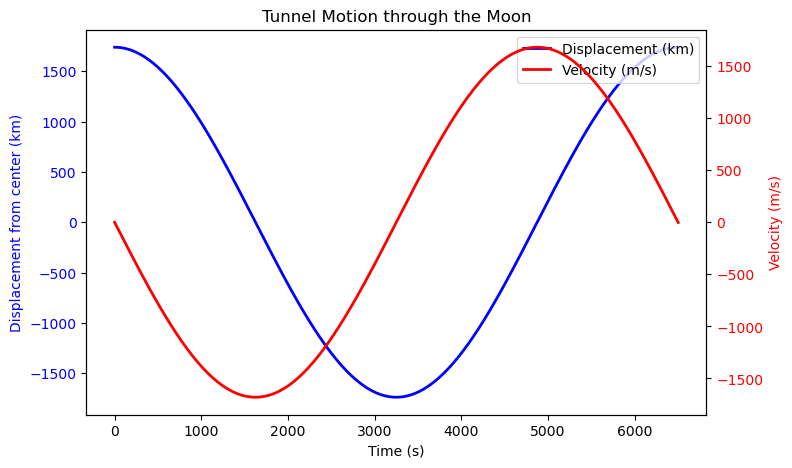

In [7]:
M_moon = 7.35e22         # kg
R_moon = 1.7381e6        # m
G = 6.6743e-11           # m^3/(kg·s^2), gravitational constant

g_moon = G * M_moon / R_moon**2
omega_moon = np.sqrt(g_moon / R_moon)
T_moon = 2 * np.pi / omega_moon
t_center_expected = T_moon / 4   # time to fall from surface (x=R_moon) to center (x=0)

def lunar_tunnel(t, X):
    return [X[1], - (g_moon / R_moon) * X[0]]

#starting at the surface with zero velocity.
X0_moon = [R_moon, 0]

t_span = (0, T_moon)
t_eval = np.linspace(0, T_moon, 1000)

soln_moon = solve_ivp(lunar_tunnel, t_span, X0_moon, t_eval=t_eval)

def lunar_center(t, X):
    return X[0]
lunar_center.terminal = True
lunar_center.direction = -1  # expecting x to decrease through 0

soln_moon_event = solve_ivp(lunar_tunnel, t_span, X0_moon, t_eval=t_eval, events=lunar_center)
if soln_moon_event.t_events[0].size > 0:
    t_center_event = soln_moon_event.t_events[0][0]
    v_center_event = soln_moon_event.y_events[0][0][1]
    
print("Time to reach center:", t_center_event, "s")
print("Speed at center:", abs(v_center_event), "m/s")

"""
This graph is just for fun to vizualize
"""
fig, ax9 = plt.subplots(figsize=(8, 5))
ax9.plot(soln_moon.t, soln_moon.y[0]/1e3, 'b-', lw=2, label="Displacement (km)")
ax9.set_xlabel("Time (s)")
ax9.set_ylabel("Displacement from center (km)", color='b')
ax9.tick_params(axis='y', labelcolor='b')

ax10 = ax9.twinx()
ax10.plot(soln_moon.t, soln_moon.y[1], 'r-', lw=2, label="Velocity (m/s)")
ax10.set_ylabel("Velocity (m/s)", color='r')
ax10.tick_params(axis='y', labelcolor='r')

ax9.set_title("Tunnel Motion through the Moon")
lines9, labels9 = ax9.get_legend_handles_labels()
lines10, labels10 = ax10.get_legend_handles_labels()
ax9.legend(lines9 + lines10, labels9 + labels10, loc='upper right')
plt.show()
